# YOLOv3 - Como criar sua própria base de imagens

O nosso conjunto de imagens customizado para fazer o treinamento com o YOLO deve conter:

* Imagens dos objetos que queremos reconhecer, já catalogadas (com os arquivos annotation)
* Arquivos obj.data e obj.names 
* Arquivo .cfg customizado
* Arquivo train.txt (test.txt é opcional)

Há duas maneiras principais de reunir as imagens dos objetos que queremos treinar. 
* A primeira é baixar de um dataset ou repositório como o Open Images Dataset, um dataset da Google que disponibiliza imagens para mais de 600 classes diferentes.
A maneira mais prática atualmente de baixar as imagens do Open Images Dataset é usar a ferramenta [OIDv4 Toolkit](https://github.com/EscVM/OIDv4_ToolKit). 
* A segunda maneira consiste em baixar manualmente as imagens do objeto e catalogá-las utilizando alguma ferramenta de anotação (annotation tool) para obter os txt com as anotações. Esse é um processo manual e que pode ser bastante demorado, portanto recomendamos verificar se a classe escolhida não está no Dataset do Google. Se você não encontrou no Open Images Dataset o objeto que deseja detectar então é necessário baixar manualmente. Por ser um método mais demorado e cansativo nós recomendamos fazer somente caso não tiver outra maneira de conseguir facilmente baixar essa imagens.

Nesse Colab iremos utilizar o primeiro método apenas, pois o segundo não é possível realizar usando apenas o Colab. Porém, deixaremos no final do tutorial as instruções que devem ser seguidas para construir o dataset manualmente.

# Coletando e catalogando as imagens do objeto para treinamento
Abaixo veremos como criar o dataset contendo as imagens dos objetos que queremos que o YOLO reconheça

## Etapa 1 - Clonando o repositório da ferramenta

Vamos baixar os arquivos do OIDv4 Toolkit para podermos fazer o download das imagens do Open Images Dataset

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 36.47 MiB/s, done.
Resolving deltas: 100% (146/146), done.


Também é possível baixar o arquivo ZIP acessando o repositório no Github: https://github.com/EscVM/OIDv4_ToolKit 

## Etapa 2 - Acessando o diretório da ferramenta 

In [ ]:
%cd OIDv4_ToolKit

/content/OIDv4_ToolKit


Vamos listar os arquivos dentro do repositório para ver se está tudo conforme o esperado

In [ ]:
ls

classes.txt  images/  LICENSE  main.py  modules/  README.md  requirements.txt


## Etapa 3 - Instalando todas as bibliotecas necessárias

In [ ]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 3.3MB 2.8MB/s 
     |████████████████████████████████| 6.6MB 30.8MB/s 
ERROR: boto3 1.14.63 has requirement botocore<1.18.0,>=1.17.63, but you'll have botocore 1.18.3 which is incompatible.
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6
  Found existing installation: botocore 1.17.63
    Uninstalling botocore-1.17.63:
      Successfully uninstalled botocore-1.17.63


Obs: pode ignorar a mensagem `WARNING: The following packages were previously imported in this runtime` (caso ela apareça)

## Etapa 4 - Fazendo o download das imagens

### Conjunto de imagens de Treinamento

Após escolher todas as classes que serão baixadas ([Explore o Dataset AQUI](https://storage.googleapis.com/openimages/web/index.html)) vamos fazer o download das imagens utilizando o comando abaixo. 

Podemos aproveitar para baixar as imagens todas em uma só pasta, para economizar um pouco de tempo nas etapas seguintes, para isso vamos adicionar o parâmetro **--multiclasses 1** em nosso comando

**Obs:** na primeira vez que executar o comando abaixo precisa digitar "Y" para os dois campos que vão aparecer ao executar. 

**Obs2:** caso o nome da classe possua espaço então precisa colocar `_` no lugar do espaço. Exemplo: *Coffee_Cup*


In [ ]:
!python main.py downloader --classes Apple Coffee_cup Horse --type_csv train --limit 2000 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Apple', 'Coffee cup', 'Horse'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 39266 KB/s, 0

Pode demorar para terminar dependendo da quantidade de imagens que você definiu para baixar para cada classe. 

Se você quiser fazer o download das imagens em seu computador ao invés do Colab então pode fazer utilizando os mesmo comandos acima.

### Conjunto de imagens de Validação

Ter um conjunto de validação não é essencial para o treinamento com YOLO porém é recomendado. Um conjunto de validação permite testarmos de forma apropriada o detector treinado. Há muitos casos onde o número de imagens disponíveis é limitado, portanto aconselha-se a utilizar tudo para o treinamento. Veremos mais para frente como você não precisa criar um set de validação para treinar usando o darknet e YOLO.

O OIDv4_Toolkit possui imagens separadas para validação para cada uma das categorias, portanto podemos aproveitar disso para obter as imagens (só lembrando que elas precisam ser diferentes da de treinamento).

A recomendação é que o dataset de validação tenha mais ou menos entre 20% e 30% do tamanho do dataset de treinamento. Então como nesse exemplo estamos baixando 2000 imagens de cada classe iremos definir `--limit` = 400. 

In [ ]:
!python main.py downloader --classes Apple Coffee_cup Horse --type_csv validation --limit 400 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Apple', 'Coffee cup', 'Horse'] together.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...100%, 16 MB, 48332 KB/s,

Pode acontecer de não ter o número suficiente de imagens que você informou, nesse caso ele vai baixar todas as imagens que tem disponível para aquela classe/tipo (treinamento ou validação)

## Etapa 5 - Convertendo os arquivos de anotação
Após terminar de baixar todas as imagens, precisamos converter os arquivos de anotação para o formato suportado pelo YOLO.

Para realizar a conversão é necessário 3 coisas: 

### 1. Colocar as classes no arquivo classes.txt
Abra o arquivo classes.txt e modifique o conteúdo para colocar as classes que baixamos, escrevendo de modo que fique uma classe por linha. Não é necessário deixar os nomes em alguma ordem, mas de preferência deixe na ordem alfabética. 

In [ ]:
!cat classes.txt

Apple
Orange
Light switch


Podemos editar o txt de duas formas. A primeira é baixar o arquivo, modificá-lo em um editor de texto, salvar e depois enviar para a pasta atual (substituindo o classes.txt atual).
A outra forma é substituir o conteúdo do arquivo usando o comando `echo`, conforme abaixo

* Substitua o que está dentro de aspas pelas classes que você baixou e quer treinar. Os nomes precisam estar separados por \n (usado para indicar que deve pular a linha), sem espaço antes ou depois (ficando apenas o espaço no próprio nome da classe, caso o nome tenha mais de uma palavra). 
Ex: `Classe\nClasse dois` 

In [ ]:
!echo -e "Apple\nCoffee cup\nHorse" > classes.txt

In [ ]:
!cat classes.txt

Apple
Coffee cup
Horse


Como podemos ver, usando o comando `cat`, o conteúdo do classes.txt foi modificado para conter os nomes das classes que queremos treinar.

### 2. Baixar o arquivo converter_annotations.py e adicione-o ao diretório

Primeiro, vamos conectar ao Google Drive, que é onde está o arquivo de conversão `converter_annotations.py`

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Para facilitar o acesso vamos criar um link simbolico (symbolic link) entre '/content/gdrive/My\ Drive/' e '/mydrive. Isso significa que estamos criando um atalho '/mydrive' para mapear os conteúdos dentro do Google Drive. 
Fazemos isso pois, além de ficar um comando mais curto, o espaço em 'my Drive' pode causar erros em certos comandos, portanto o link simbolico além de encurtar o comando vai impedir que isso aconteça. 

In [ ]:
ls

classes.txt  LICENSE  modules/  README.md
images/      main.py  OID/      requirements.txt


In [ ]:
# link simbolico 
!ln -s /content/gdrive/My\ Drive/ /mydrive

Criar o link simbólico é opcional. Caso não queira (ou dê algum erro ao criar) basta substituir essa parte nos comandos, onde tiver `/mydrive/` substitua por `/content/gdrive/My\ Drive/`

In [ ]:
!ls /mydrive/Cursos/YOLO
!ls /content/gdrive/My\ Drive/Cursos/YOLO

Em seguida, vamos extrair o arquivo MaterialYOLO.zip, que contém os scripts que iremos precisar (se preferir, você pode fazer o upload desse zip diretamente na VM do Colab, sem precisar enviar pro Drive e copiar de lá, porém recomendamos dessa primeira maneira por ser muito mais prática, assim pode automatizar essa parte)

In [ ]:
!unzip /mydrive/Cursos/YOLO/MaterialYOLO -d /content/
!ls /content/

Agora vamos copiar o arquivo de conversão para o diretório atual `(/content/OIDv4_ToolKit)`

In [ ]:
!cp /content/converter_annotations.py ./

### 3. Executar o arquivo de conversão



Por fim, vamos executar o arquivo que realiza a conversão

In [ ]:
!python converter_annotations.py

Subdiretorio atual: train
Convertendo os annotations para a classe:  Apple_Coffee cup_Horse
100% 600/600 [00:21<00:00, 27.38it/s]
Subdiretorio atual: validation
Convertendo os annotations para a classe:  Apple_Coffee cup_Horse
100% 443/443 [00:10<00:00, 41.73it/s]


## Etapa 6 - Compactar o dataset 
Agora que temos o nosso dataset praticamente pronto só resta compactar todos os arquivos em um arquivo .zip para facilitar a transferência. 
Nós podemos baixar diretamente o arquivo da máquina virtual do Colab ou salvar esse arquivo .zip diretamente no Google Drive (que é o mais recomendado por ser mais rápido).

Antes vamos renomear para "`obj`" o nome do diretorio que foi criado dentro de train, que contém as imagens baixadas dos objetos.  

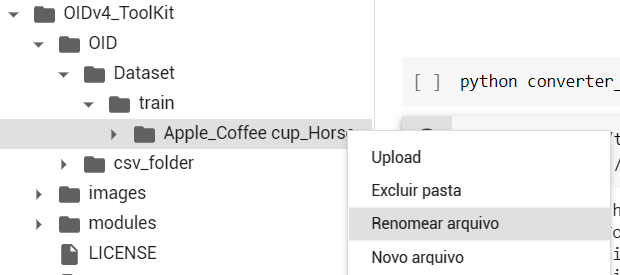

In [ ]:
%cd OID/Dataset/train/
!zip -r ../../../../obj.zip obj -x obj/Label/*

(o parâmetro ` -x objetos/Label/*` faz com que o comando ignore a pasta Label. Não vamos precisar incluir ela porque depois que o arquivo de conversão foi executado os arquivos de anotação .txt agora estão juntos com as imagens)

In [ ]:
# voltando para o diretório principal
%cd ../../../../
!ls

/content
converter_annotations.py  gerar_test.py   imgs_testes  OIDv4_ToolKit
gdrive			  gerar_train.py  obj.zip      sample_data


Execute o código abaixo para salvar o nosso dataset (.zip) no Google Drive. Iremos salvar dentro da pasta `treinamento`, que criamos dentro do diretório principal onde estamos salvando os arquivos do curso.

In [ ]:
!cp ./obj.zip /mydrive/Cursos/YOLO/treinamento

Se você não quiser salvar no Google Drive (ou caso não tenha mais espaço disponível lá, por exemplo) você pode fazer o download do arquivo (pelo painel lateral esquerdo) clicando com o botão direito e selecionando "Download" (porém pode ser mais demorado pois o arquivo tende a ser pesado, principalmente se tiver mais de 2000 imagens no total)

In [ ]:
ls /mydrive/Cursos/YOLO/treinamento

Caso você esteja fazendo também o set de validação então repita esses procedimentos acima, mas agora renomeie a pasta (dentro de `OID/Dataset/validation/`) para "valid".

In [ ]:
# ir até o diretório com as imagens de validação e compactar
%cd OIDv4_ToolKit/OID/Dataset/validation/
!zip -r ../../../../valid.zip valid -x valid/Label/*

# voltando para o diretório principal
%cd ../../../../

In [ ]:
ls

converter_annotations.py  gerar_train.py  OIDv4_ToolKit/
gdrive/                   imgs_testes/    sample_data/
gerar_test.py             obj.zip         valid.zip


E para salvar no Google Drive:

In [ ]:
!cp ./valid.zip /mydrive/Cursos/YOLO/treinamento

# Editando os arquivos de configuração necessários para o treinamento

Agora que fizemos o download das imagens e compactamos em um arquivo zip, vamos configurar os arquivos que contém as configurações necessárias para realizar o treinamento do modelo.

Para isso vamos baixar o repositório darknet, que contém esses arquivos que precisamos modificar. Antes só verifique se o diretório atual é o principal (`/content`)

In [ ]:
pwd

'/content'

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14309, done.
remote: Total 14309 (delta 0), reused 0 (delta 0), pack-reused 14309
Receiving objects: 100% (14309/14309), 12.85 MiB | 19.26 MiB/s, done.
Resolving deltas: 100% (9763/9763), done.


In [ ]:
ls

converter_annotations.py  gerar_test.py   obj.zip         valid.zip
darknet/                  gerar_train.py  OIDv4_ToolKit/
gdrive/                   imgs_testes/    sample_data/


In [ ]:
%cd darknet

/content/darknet


`Obs: aqui não iremos mudar o makefile para ativar as opções para GPU e OPENCV já que nesse arquivo não estaremos fazendo o treinamento ou vários testes (apenas uma detecção de teste)`

Build no Darknet: 

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:249:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:845:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:853:33: warning: c

## Etapa 7 - Definindo os arquivos de configuração

### Modificações no .cfg

Agora precisamos editar o arquivo .cfg de acordo com a configuração necessária. Vamos fazer uma cópia do yolov3.cfg (pro Drive) para realizarmos as modificações (note que com o comando `cp` podemos fazer uma cópia e definir outro nome, nesse caso definimos `yolov3_custom.cfg`)

In [ ]:
!cp cfg/yolov3.cfg /mydrive/Cursos/YOLO/treinamento/yolov3_custom.cfg

Abra esse arquivo (yolov3_custom.cfg) em um editor de texto. Para isso você pode fazer o download do arquivo e depois editar/salvar e fazer o upload, ou você pode editar com o "Text Editor" do Google Drive, basta clicar com o botão direito sobre o arquivo e selecionar `Abrir com > Text Editor`.

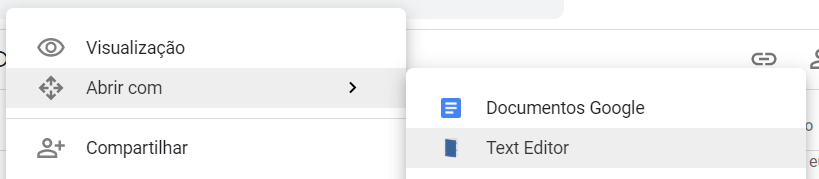

Resumidamente, as modificações que teremos que fazer são essas:

1. Comentar as linhas onde batch=1 e subdivisions=1
2. Descomentar as linhas onde batch=64 e subdivisions=16
3. Mudar o valor de max_batches para ser = 2000 * número de classes. Então se por exemplo estamos treinando 3 classes diferentes o valor ficará 6000 (3 * 2000)
4. Mudar o valor de steps. Os valores escolhidos devem seguir essa fórmula: 80% do max_batches, 90% do max_batches. Em nosso exemplo o max_batches ficou 6000, logo esse dois valores devem ficar: 4800 (6000 * 0,8) e 5400 (6000 * 0,9)
5. Mudar o valor classes. Em cada uma das camadas [yolo] precisaremos alterar os valores que indicam o número de classes. Procure por [yolo] (ctrl+F) e abaixo dessas linhas terá vários campos (mask, anchors, classes, etc). Vamos mudar o valor do campo classes para a quantidade de objetos (classes) que estamos treinando. Então por exemplo, de classes=80 vai ficar classes=3
6. Mudar o filtros. Agora devemos alterar as camadas [convolutional] que estão logo antes das [yolo]. Repare que quando procuramos por [yolo] tinha logo acima [convolutional], com alguns campos logo abaixo. 
No meio desses campos procure pelo campo “filters” e atribua à ele o seguinte valor = ((número de classes + 5) * 3). Em nosso exemplo ficou 24 ((3 + 5) * 3)
7. Essa última modificação é opcional pois só é recomendada caso o treinamento apresente algum erro no meio do processo (por uso excessivo de memória), o que é difícil mas pode ocorrer dependendo da configuração da máquina. Também é recomendado caso queira que o tempo de treinamento seja mais rápido (porém a detecção será menos precisa).
Se esse for o caso então altere o valor de random (última linha de [yolo]) para 0 (antes estava =1).

Você também pode mudar o tamanho da rede (que por padrão é 416x416) alterando os valores “width” e “height“ no arquivo cfg. 
Quanto maior o tamanho melhor vai ser a detecção para objetos que contém muitos detalhes (pois durante o treinamento o detector vai conseguir “ver” mais detalhes), no entanto o tempo de treinamento e detecção será maior.
Se o seu objeto tiver muitos detalhes pequenos você pode tentar fazer o treinamento com um tamanho maior, como 608x608 por exemplo.
Até o YOLOv3 o padrão era 416x416, mas a partir do YOLOv4 o cfg passou a vir por padrão com o valor 608x608.
Atenção: esse valor do tamanho para “width” e “height“ precisa ser divisível por 32.

**Obs:**  Esses valores que definimos são os recomendados, mas se você quiser testar você pode mudar esses valores e fazer o treinamento para ver se há alguma mudança na acurácia do modelo.
Por exemplo, subdivisions = 16 costuma dar resultados melhores mas muitos colocam 32 ou até 64 para evitar problemas relacionados à falta de memória. 







### Modificações no obj.names e obj.data

Vamos executar os comandos abaixo para criar os arquivos obj.names e obj.data, que vamos precisar para definir algumas configurações do modelo a ser treinado

In [ ]:
!touch obj.names
!touch obj.data

Após criado esses arquivos vamos copiá-los para o drive, para podermos editar mais facilmente

In [ ]:
!cp obj.names /mydrive/Cursos/YOLO/treinamento/obj.names
!cp obj.data /mydrive/Cursos/YOLO/treinamento/obj.data

Precisamos modificar os arquivos para que fiquem nesse padrão:

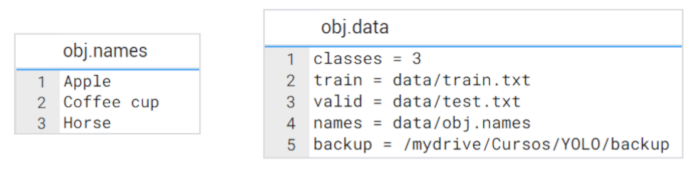

Depois de editar ambos os arquivos basta salvá-los.

Se quiser conferir o conteúdo do arquivo obj.data podemos usar o comando `cat`.

In [ ]:
!cat /mydrive/Cursos/YOLO/treinamento/obj.data

classes = 3
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = /mydrive/Cursos/YOLO/backup

## Etapa 8 - Gerando o arquivo train.txt e test.txt

Os últimos arquivos necessários para terminar a configuração do nosso dataset personalizado são o train.txt e o test.txt, responsáveis por conter o caminho relativo de todas as imagens de treinamento e de validação, respectivamente.

Para não precisar adicionar todos os caminhos manualmente nós iremos usar um script em python que irá listar todas essas imagens (com os respectivos caminhos relativos) no txt.

Para gerar o train.txt vamos executar o script `gerar_train.py`. Antes só precisamos extrair o set de treinamento (obj.zip) e validação (valid.zip) dentro do diretório `/data` no darknet

In [ ]:
!unzip ../obj.zip -d ./data
!unzip ../valid.zip -d ./data

In [ ]:
!cp /content/gerar_train.py ./
!python gerar_train.py

E para verificar se deu tudo certo, clique duas vezes sobre o arquivo train.txt no File Explorer (menu lateral esquerdo), dentro da pasta darknet/data

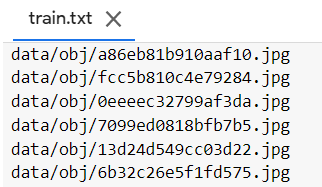

O test.txt (para validação) é opcional mas recomendado pois com ele podemos acompanhar melhor o progresso do treinamento já que assim será possível visualizar a acurácia do modelo (mAP) conforme ele é treinado.

Conforme comentamos, nem sempre será o caso de gerar um dataset separado para validação. Se você preferiu gerar esse dataset então execute os dois comandos abaixo. Caso contrário, execute a célula após essa.

In [ ]:
!cp /content/gerar_test.py ./
!python gerar_test.py

Se você possui um número limitado de imagens e por isso quer utilizar todas para o treinamento (o que é recomendado em situações assim), ou por algum outro motivo você não criou um dataset de validação, então você também pode acompanhar o mAP, basta fazer uma cópia do arquivo `train.txt` e renomeá-lo para `test.txt`. 
Você pode fazer isso através do comando abaixo.

Nesse nosso exemplo optamos por deixar o train.txt e test.txt iguais pois obtemos muito poucas imagens de validação para uma das classes. Mas se quiser gerar um set separado basta não executar a célula abaixo e rodar apenas o gerar_test.py

In [ ]:
# só use caso não tenha baixado o set de validação
!cp data/train.txt data/test.txt

Por fim, vamos copiar o train.txt e o test.txt para o diretório no Google Drive onde estamos salvando os arquivos necessários pro treinamento. 

In [ ]:
!cp data/train.txt /mydrive/Cursos/YOLO/treinamento/train.txt
!cp data/test.txt /mydrive/Cursos/YOLO/treinamento/test.txt

Pronto! Agora temos todos os arquivos necessários para o treinamento.

Vamos visualizar os arquivos que geramos até agora:

In [ ]:
ls /mydrive/Cursos/YOLO/treinamento/

backup/   obj.names  test.txt   valid.zip          yolov3_custom_copia.cfg
obj.data  obj.zip    train.txt  yolov3_custom.cfg  yolov4_custom.cfg


# Criando seu dataset (método manual)

As vezes pode ser necessário construir seu próprio conjunto de imagens manualmente pois em alguns casos, conforme comentado, o objeto que queremos não está presente no Open Images Dataset ou em outra base de imagens disponibilizada na internet. 

Iremos brevemente explicar como você pode montar seu dataset para qualquer tipo de objeto usando as imagens do Google Imagens.

Para montar seu conjunto de imagens nessa situação você tem duas opções:
 * Baixar imagem por imagem manualmente
 * Utilizar um script para baixar multiplas imagens de uma única vez

A primeira opção é certamente a mais demorada, mas caso decida fazê-la você pode começar na etapa 8. Mas para ser mais rápido recomendamos a segunda opção, para isso é necessário executar todos os passos abaixo: 

1) Ir até o site do [Google Imagens](https://www.google.com.br/imghp) e pesquisar pelo objeto escolhido.

2) Descer a barra de rolagem até o momento que você julgar ser o suficiente (pois o script irá baixar todas as imagens que aparecem na página até do ponto que você parou de rolar a barra). Recomendamos ir até o momento que a qualidade das imagens estiver boa (ou até onde começar a aparecer muitas imagens que não estão tão relacionadas ao objeto pesquisado)

3) Executar os comandos javascript (do arquivo: codigos_console.js)

4) Após executar o último comando javascript será baixado o arquivo `urls.txt`. Mova esse arquivo até a pasta onde você salvou os arquivos presentes no `dataset_manual.zip`

5) Criar uma pasta chamada `imagens` e dentro dela crie uma pasta com o nome da classe (caso esteja baixando imagens para mais de uma classe/objeto então crie uma pasta para cada classe)

6) Execute o script download_images.py. Dependendo do tamanho pode levar alguns minutos para baixar todas as imagens.

7) Acesse o diretório onde estão as imagens e revise se há alguma que não contém o objeto ou que não seja boa e portanto não queira incluir no dataset. Obs: o script foi programado para automaticamente considerar apenas imagens de fato, então no momento do download ele é para descartar imagens inválidas ou vazias. 

8) Executar os comandos para instalar as bibliotecas necessárias para a utilização do repositório *labelImg* (https://github.com/tzutalin/labelImg). Execute os comandos listados (ou, dependendo da configuração do seu ambiente, acesse o README do repositório pois lá tem todos os comandos para vários ambientes diferentes)

9) Clonar o repositório *labelImg* e acessar (usando o comando cd)

10) Criar o arquivo classes.txt, que vai conter as classes dos objetos que queremos treinar. 

11) Executar o seguinte comando `python labelImg.py [PASTA COM AS IMAGENS] [ARQUIVO classes.txt]`

Esse comando abrirá a interface do programa. 

12) Clique no botão PascalVOC (menu) de modo que seja alterado para YOLO. Se estiver aparecendo YOLO no lugar então pode seguir em frente.

13) Agora podemos começar a rotular as imagens. Clique no botão "Create RectBox" e em seguida clique e arraste o cursor do mouse sobre a área do objeto, de modo que o cubra totalmente da melhor forma possível. Após soltar o mouse vai aparecer uma janela pedindo para escolher qual a classe do objeto que você acabou de selecionar (de acordo com o que você adicionou no classes.txt). Selecione a classe correspondente ao objeto que você acabou de selecionar e clique no botão OK. 

Caso sua imagem contenha mais de um objeto então faça o mesmo processo. Se você já tiver selecionado todos os objetos que aparecem na imagem então clique em "Save" e confirme para salvar o .txt na pasta desejada (a mesma pasta onde estão as imagens) 

Em seguida clique sobre o botão "Next Image".

Repita o mesmo procedimento para todas as imagens desejadas.

Após terminar de montar seu dataset, compacte a pasta que contém as imagens e os txts para um zip chamado obj.zip. Em seguida, continue a seguir os passos do inicio desse Colab, a partir da Etapa 7 ("Definindo os arquivos de configuração").


Créditos do script para download de imagens do Google: [PyImageSearch](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)